# 1. Loading Dataset

In [32]:
#importing needed libraries

import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.metrics import mean_squared_error

In [33]:
#Loading Datasets from github link to Dataframe
X_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/X_test.csv?raw=true')
X_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/X_train.csv?raw=true')

y_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/y_test.csv?raw=true')
y_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/y_train.csv?raw=true')

In [34]:
X_train


,SM1_Dz,GATS1i,MLOGP
0,-1.154697,0.957682,2.857958
1,-1.154697,-1.143385,-0.237564
2,0.022259,-0.991134,0.787295
3,-0.694657,0.467941,0.496872
4,-0.946862,-0.744994,-0.005086
...,...,...,...
721,-0.946862,-1.107859,-0.421173
722,0.470624,1.186059,0.081482
723,-0.694657,1.835664,-0.500063
724,1.173528,-0.978446,0.976489


# 2. Running OLS Model

*** Running Default Model ***




In [35]:
#Standard OLS Model
X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(y_train, X_train_off)
 
model = smRegression.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     261.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.02e-114
Time:                        04:31:04   Log-Likelihood:                -750.20
No. Observations:                 726   AIC:                             1508.
Df Residuals:                     722   BIC:                             1527.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.025     -0.074      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


- Low R-squared and Adj. R-squared. Points to data not fitting line well
- High F-statistic and low Prob(F-statistic). Means that there it is statistically likely are model has a linear relationship with the features. 
- T values low for GATS1i and the constant value pointing to them possibly not being related to target value

*** Running Trimmed Model ***


In [36]:
x_Trimmed = X_train.drop(columns = ['GATS1i'], axis = 0)
X_train_off2 = sm.add_constant(x_Trimmed)
smRegressionTrimmed = sm.OLS(y_train, X_train_off2)
 
modelTrimmed = smRegressionTrimmed.fit()
print(modelTrimmed.summary())

                            OLS Regression Results                            
Dep. Variable:                   LC50   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     377.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.37e-113
Time:                        04:31:07   Log-Likelihood:                -757.48
No. Observations:                 726   AIC:                             1521.
Df Residuals:                     723   BIC:                             1535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0031      0.026     -0.120      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


*** Running Trimmed Model (No Constant Term) ***


In [37]:
smRegressionNoConstant = sm.OLS(y_train, x_Trimmed)
 
modelTrimmedNoConstant = smRegressionNoConstant.fit()
print(modelTrimmedNoConstant.summary())

                                 OLS Regression Results                                
Dep. Variable:                   LC50   R-squared (uncentered):                   0.511
Model:                            OLS   Adj. R-squared (uncentered):              0.509
Method:                 Least Squares   F-statistic:                              377.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   4.49e-113
Time:                        04:31:11   Log-Likelihood:                         -757.49
No. Observations:                 726   AIC:                                      1519.
Df Residuals:                     724   BIC:                                      1528.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

*** Testing on default Model ***

In [ ]:
ypred = model.predict(sm.add_constant(X_test))
ypredTrain = model.predict(sm.add_constant(X_train))

print(mean_squared_error(y_train, ypredTrain))
print (mean_squared_error(y_test, ypred))
 

0.4624573943484721
0.5693635096533028


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


*** Testing on Trimmed Model *** 

In [38]:
x_test_trim = X_test.drop(columns = ['GATS1i'], axis = 0)
ypredTrimmedTrain = modelTrimmed.predict(sm.add_constant(X_train_off2))
ypredTrimmedTest = modelTrimmed.predict(sm.add_constant(x_test_trim))

print(mean_squared_error(y_train, ypredTrimmedTrain))
print (mean_squared_error(y_test, ypredTrimmedTest))


0.47182331724140547
0.5806355345467822


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


*** Testing on Trimmed Model (No Constant) *** 

In [39]:
ypredNoConstTrain = modelTrimmedNoConstant.predict(x_Trimmed)
ypredNoConstTest = modelTrimmedNoConstant.predict(x_test_trim)

print(mean_squared_error(y_train, ypredNoConstTrain))
print (mean_squared_error(y_test, ypredNoConstTest))


0.4718326608024174
0.5805522830820986


*** Creating Graphical Representation of Results ***

In [40]:
#creating dictionary/dataframe
d = {'Model': ["Base", "Trimmed", "No Constant"], 'Trained MSE': [mean_squared_error(y_train, ypredTrain), mean_squared_error(y_train, ypredTrimmedTrain), mean_squared_error(y_train, ypredNoConstTrain)]}
dfTestResults = pd.DataFrame(data=d)
dfTestResults


,Model,Trained MSE
0,Base,0.462457
1,Trimmed,0.471823
2,No Constant,0.471833


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

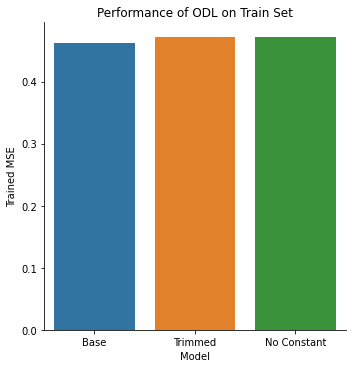

,Model,Trained MSE
0,Base,0.462457
1,Trimmed,0.471823
2,No Constant,0.471833


In [41]:
#creating train plot
plt.figure(figsize = (15, 10))
ax = sns.factorplot(data = dfTestResults, x = 'Model', y = 'Trained MSE', kind = 'bar').set(title = 'Performance of ODL on Train Set')
plt.show()

dfTestResults


In [42]:
#creating dictionary/dataframe
d2 = {'Model': ["Base", "Trimmed", "No Constant"], 'Test MSE': [mean_squared_error(y_test, ypred), mean_squared_error(y_test, ypredTrimmedTest), mean_squared_error(y_test, ypredNoConstTest)]}
dfTestResults2 = pd.DataFrame(data=d2)
dfTestResults2

,Model,Test MSE
0,Base,0.569364
1,Trimmed,0.580636
2,No Constant,0.580552


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

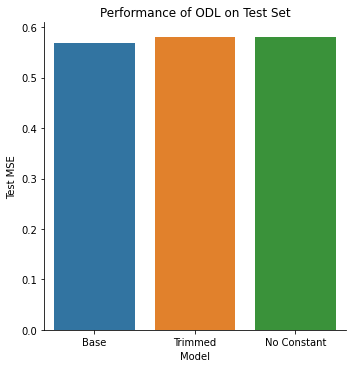

,Model,Test MSE
0,Base,0.569364
1,Trimmed,0.580636
2,No Constant,0.580552


In [43]:
#creating test plot
plt.figure(figsize = (15, 10))
ax = sns.factorplot(data = dfTestResults2, x = 'Model', y = 'Test MSE', kind = 'bar').set(title = 'Performance of ODL on Test Set')
plt.show()
dfTestResults2

MSE lower on base model than others.